In [57]:
# Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# NLP

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from nltk import FreqDist

from wordcloud import WordCloud

# ML

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler 



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
data = pd.read_csv("/content/data.csv", encoding= 'unicode_escape')
data.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
print("Rows = ", data.shape[0])
print("Cols = ", data.shape[1])

Rows =  541909
Cols =  8


In [6]:
data.isnull()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data = data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 406829, dtype: bool

In [10]:
data.duplicated().sum()

5225

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [11]:
print("Updated Rows = ", data.shape[0])
print("Updated Cols = ", data.shape[1])

Updated Rows =  406829
Updated Cols =  8


In [12]:
df_1 = data['InvoiceDate'].str.split(" ", expand = True)

In [13]:
data['InvoiceDate'] = df_1[0]

data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')
data["CustomerID"]=data["CustomerID"].astype(int)

In [14]:
#Dropping Cancelled Data

cancelled_data = data[data["InvoiceNo"].str[0]=="C"]
cancelled_index = data[data["InvoiceNo"].str[0]=="C"].index

data.drop(cancelled_index, inplace = True)
data.drop("InvoiceNo",axis=1, inplace = True)

data=data.reset_index(drop=True)

data.shape

(397924, 7)

In [15]:
data["Quantity"]=abs(data["Quantity"])
data["UnitPrice"]=abs(data["UnitPrice"])

In [16]:
df=pd.DataFrame()

In [17]:
df['Description']=data['Description'] 

In [18]:
df.duplicated().sum()

394047

In [19]:
df=df.drop_duplicates()

In [20]:
df

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
388996,"LETTER ""W"" BLING KEY RING"
388998,"LETTER ""Z"" BLING KEY RING"
390784,PINK CRYSTAL SKULL PHONE CHARM
395335,CREAM HANGING HEART T-LIGHT HOLDER


In [21]:
df['description_processed'] = df['Description'].str.replace("[^a-zA-Z]", " ")
df[["Description",'description_processed']].sample(10)

<ipython-input-21-ae0bcdf64929>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description_processed'] = df['Description'].str.replace("[^a-zA-Z]", " ")


,Description,description_processed
99568,CHILDRENS CUTLERY SPACEBOY,CHILDRENS CUTLERY SPACEBOY
49417,MEDIUM PINK BUDDHA HEAD,MEDIUM PINK BUDDHA HEAD
17778,4 VANILLA BOTANICAL CANDLES,VANILLA BOTANICAL CANDLES
5573,PINK PAINTED KASHMIRI CHAIR,PINK PAINTED KASHMIRI CHAIR
24498,WHITE HEART CONFETTI IN TUBE,WHITE HEART CONFETTI IN TUBE
8947,ASSORTED TUTTI FRUTTI NOTEBOOK,ASSORTED TUTTI FRUTTI NOTEBOOK
101,CHARLIE & LOLA WASTEPAPER BIN FLORA,CHARLIE LOLA WASTEPAPER BIN FLORA
1368,FAIRY CAKE BIRTHDAY CANDLE SET,FAIRY CAKE BIRTHDAY CANDLE SET
17310,TURQ+RED BOUDICCA LARGE BRACELET,TURQ RED BOUDICCA LARGE BRACELET
490,DOORMAT UNION JACK GUNS AND ROSES,DOORMAT UNION JACK GUNS AND ROSES


In [22]:
# Lower Case

df['description_processed'] = [review.lower() for review in df['description_processed']]

In [23]:
# Replacing Shortwords

df['description_processed'] = df['description_processed'].apply( lambda row:" ".join([word for word in row.split() if len(word)>2 ]))
df[["Description",'description_processed']].sample(10)

,Description,description_processed
218546,HAPPY BIRTHDAY CARD STRIPEY TEDDY,happy birthday card stripey teddy
2181,TEA PARTY BIRTHDAY CARD,tea party birthday card
1538,ANT WHITE WIRE HEART SPIRAL,ant white wire heart spiral
363,GUMBALL COAT RACK,gumball coat rack
21472,LONDON BUS COFFEE MUG,london bus coffee mug
19751,RETRO BROWN BALL ASHTRAY,retro brown ball ashtray
1150,MAKE YOUR OWN FLOWERPOWER CARD KIT,make your own flowerpower card kit
3862,BLUE POLKADOT PASSPORT COVER,blue polkadot passport cover
268586,WALL ART GARDEN HAVEN,wall art garden haven
488,CLEAR ACRYLIC FACETED BANGLE,clear acrylic faceted bangle


In [24]:
# Stop Words Removal

stop_words = stopwords.words('english')

add_words = ['round','shape','square','oval','ivory','water','charm','polkadot','heart','home','sweet','large','small','mini','set','design','red','purple','blue','pink','white','black','dark','pack','green','yellow','orange','rise','love']

stop_words.extend(add_words)

def remove_stopwords(r):
    review_tokenized = word_tokenize(r)
    r_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return r_new

df['description_processed'] = [remove_stopwords(j) for j in df['description_processed']]

In [25]:
lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['description_processed'] = df['description_processed'].apply(lambda x: lemmatize_sentence(x))

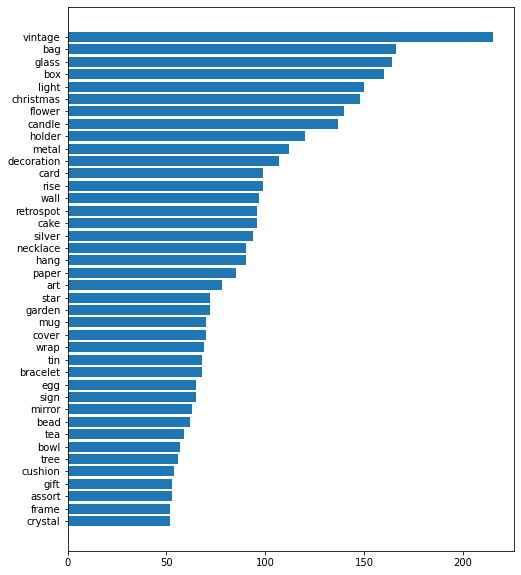

In [26]:
# Word's Plot

all_words = ' '.join([text for text in df['description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)


wrd_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
wrd_df

wrd_df = wrd_df.nlargest(columns="count", n = 40) 

wrd_df.sort_values('count', inplace = True)


plt.figure(figsize=(8,10))
ax = plt.barh(wrd_df['word'], width = wrd_df['count'])
plt.show()

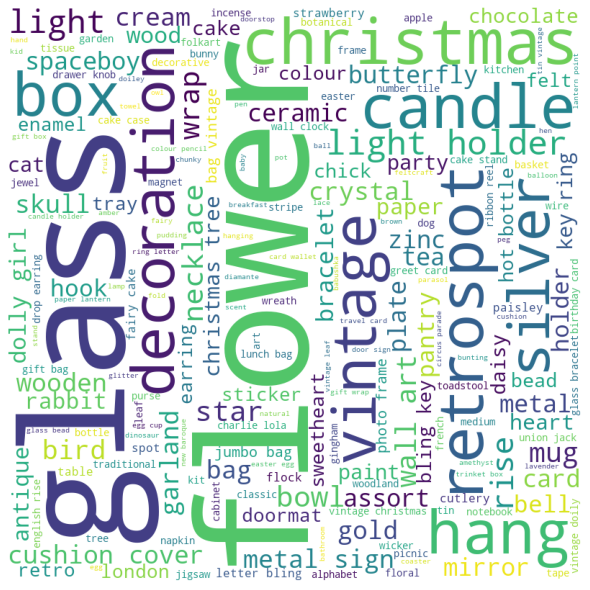

In [27]:
all_words = ' '.join([text for text in df['description_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(all_words)

                       
plt.figure(figsize = (8, 8), facecolor = None) 

plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [28]:
tfidf = TfidfVectorizer(max_features = 2500)
X = tfidf.fit_transform(df.description_processed)
features = tfidf.get_feature_names()
print(len(features))

1696


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


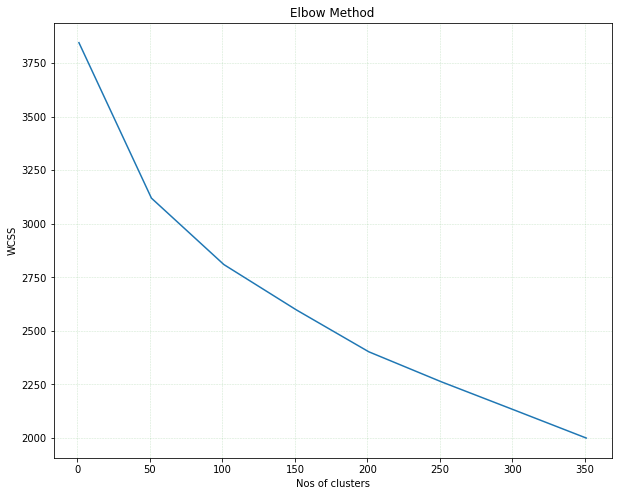

In [29]:
wcss = []

for i in range(1,400,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10, 8), facecolor = None) 
plt.plot(range(1,400,50),wcss)

plt.title('Elbow Method')
plt.xlabel('Nos of clusters')
plt.ylabel('WCSS')

plt.savefig('elbow.png')

plt.grid(which="minor",alpha=0.6,linewidth=0.)
plt.grid(which="major",alpha=0.2,linewidth=0.3)

plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [30]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(X)
cluster=kmeans.labels_

In [31]:
df["cluster_value"]=cluster
df[["Description",'description_processed',"cluster_value"]].sample(10)

,Description,description_processed,cluster_value
150682,"LETTER ""E"" BLING KEY RING",letter bling key ring,11
1118,IVORY ENCHANTED FOREST PLACEMAT,enchant forest placemat,4
1285,RECIPE BOX PANTRY YELLOW DESIGN,recipe box pantry,2
304894,STRAWBERRY CERAMIC TRINKET POT,strawberry ceramic trinket pot,0
391,PARTY INVITES FOOTBALL,party invite football,22
10827,VINYL RECORD FRAME SILVER,vinyl record frame silver,10
1496,CUSHION COVER PINK UNION JACK,cushion cover union jack,34
266444,VEGETABLE GARDEN CHOPPING BOARD,vegetable garden chop board,37
24508,MURANO STYLE GLASS BRACELET RED,murano style glass bracelet,7
35316,SET 3 PAPER VINTAGE CHICK PAPER EGG,paper vintage chick paper egg,28


In [32]:
grp=df.groupby(["cluster_value"])["description_processed"].apply(list)
grp[10]

['wooden picture frame finish',
 'wooden frame antique',
 'photo cube',
 'photo frame cornice',
 'triple photo frame cornice',
 'family photo frame cornice',
 'record cover frame',
 'record frame single size',
 'classic frame',
 'picture frame wood triple portrait',
 'photo frame classic hanging',
 'flock photo frame',
 'photo frame',
 'juicy fruit photo frame',
 'juicy fruit photo frame',
 'family album picture frame',
 'snowstorm photo frame fridge magnet',
 'magnet retro photo',
 'new baroque photo album',
 'grand baroque photo frame',
 'picture frame sticker',
 'mirror wall art photo frame',
 'vinyl record frame silver',
 'danish rise photo frame',
 'silver photo frame',
 'gold photo frame',
 'eau nile photo frame',
 'jewelled photo frame',
 'jewelled photo frame',
 'pastel photo album',
 'fan frame',
 'photo album',
 'pastel photo album',
 'edwardian photo frame',
 'frame bird tree',
 'flock photo frame',
 'edwardian photo frame',
 'parisienne photo frame',
 'antique photo frame',

In [33]:
df_merge = data.merge(df,left_on="Description",right_on="Description")
df_merge.sample(5)

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,description_processed,cluster_value
381357,82486,3 DRAWER ANTIQUE WHITE WOOD CABINET,4,2011-09-25,8.95,16480,United Kingdom,drawer antique wood cabinet,43
142685,22651,GENTLEMAN SHIRT REPAIR KIT,3,2011-11-22,0.85,14505,United Kingdom,gentleman shirt repair kit,0
79205,22413,METAL SIGN TAKE IT OR LEAVE IT,2,2011-09-06,2.95,14715,United Kingdom,metal sign take leave,38
14858,22629,SPACEBOY LUNCH BOX,12,2011-09-29,1.95,12372,Denmark,spaceboy lunch box,33
331048,23139,SINGLE WIRE HOOK PINK HEART,12,2011-11-29,1.45,12748,United Kingdom,single wire hook,0


In [34]:
df_merge.drop(["Description","description_processed","StockCode"],axis=1,inplace=True)
df_merge["Month"]=df_merge["InvoiceDate"].dt.month
df_merge.sample(10)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_value,Month
29363,24,2011-01-25,0.55,12744,Singapore,39,1
251800,2,2010-12-12,0.85,16779,United Kingdom,0,12
378294,1,2011-10-23,3.75,14698,United Kingdom,0,10
186672,12,2011-01-28,1.25,15159,United Kingdom,20,1
277548,12,2011-08-03,0.85,17659,United Kingdom,4,8
384986,12,2011-11-07,1.65,17158,United Kingdom,0,11
368610,2,2011-12-04,2.49,17936,United Kingdom,2,12
6875,9,2011-10-13,5.95,12766,Portugal,2,10
129644,1,2011-11-14,1.25,15572,United Kingdom,13,11
91782,3,2011-08-11,1.65,17284,United Kingdom,33,8


In [35]:
df_merge.shape

(397924, 7)

In [36]:
df_merge["Total_price"]=df_merge["Quantity"]*df_merge["UnitPrice"]
df_merge.sample(10)

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cluster_value,Month,Total_price
168265,1,2011-09-04,0.39,16241,United Kingdom,2,9,0.39
14868,1,2011-10-04,1.95,14178,United Kingdom,33,10,1.95
185638,4,2011-10-26,1.25,15005,United Kingdom,2,10,5.00
39857,6,2011-10-06,2.95,13940,United Kingdom,28,10,17.70
78945,2,2011-12-02,0.55,15547,United Kingdom,38,12,1.10
99586,4,2011-06-19,1.65,16880,United Kingdom,0,6,6.60
99371,4,2011-10-26,8.25,14315,United Kingdom,49,10,33.00
375977,40,2011-11-15,2.08,15981,United Kingdom,14,11,83.20
107835,2,2011-08-11,2.95,17841,United Kingdom,2,8,5.90
258727,6,2011-05-24,2.95,17659,United Kingdom,8,5,17.70


In [37]:
df_2 =df_merge 

In [38]:
df_2.drop(["Quantity","UnitPrice"],axis=1,inplace=True)
df_2.head()

,InvoiceDate,CustomerID,Country,cluster_value,Month,Total_price
0,2010-12-01,17850,United Kingdom,6,12,15.3
1,2010-12-01,17850,United Kingdom,6,12,15.3
2,2010-12-01,17850,United Kingdom,6,12,15.3
3,2010-12-01,17511,United Kingdom,6,12,163.2
4,2010-12-01,13408,United Kingdom,6,12,81.6


In [39]:
len(df_2["Country"].unique())

37

In [40]:
df_2.shape

(397924, 6)

In [41]:
df_2.head()

,InvoiceDate,CustomerID,Country,cluster_value,Month,Total_price
0,2010-12-01,17850,United Kingdom,6,12,15.3
1,2010-12-01,17850,United Kingdom,6,12,15.3
2,2010-12-01,17850,United Kingdom,6,12,15.3
3,2010-12-01,17511,United Kingdom,6,12,163.2
4,2010-12-01,13408,United Kingdom,6,12,81.6


In [42]:
country_df = df_2.groupby("CustomerID").agg({'Country':pd.Series.mode})
country_df.reset_index()
country_dummy=pd.get_dummies(country_df["Country"])
country_dummy=country_dummy.reset_index()
print(country_dummy.shape)
country_dummy.head()

(4339, 38)


,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
month_df=df_2[['CustomerID','Month']]
pd.get_dummies(month_df["Month"])
month_dummy= pd.get_dummies(month_df, columns = ['Month'])
month_dummy=month_dummy.groupby("CustomerID").agg("sum").astype(int)
month_dummy=month_dummy.reset_index()
print(month_dummy.shape)
month_dummy.head()

(4339, 13)


,CustomerID,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,12346,1,0,0,0,0,0,0,0,0,0,0,0
1,12347,29,0,0,24,0,18,0,22,0,47,0,42
2,12348,6,0,0,5,0,0,0,0,3,0,0,17
3,12349,0,0,0,0,0,0,0,0,0,0,73,0
4,12350,0,17,0,0,0,0,0,0,0,0,0,0


In [44]:
cluster_df=df_2[['CustomerID','cluster_value']]
pd.get_dummies(cluster_df["cluster_value"])
cluster_dummy= pd.get_dummies(cluster_df, columns = ['cluster_value']).astype(int)
cluster_dummy=cluster_dummy.groupby("CustomerID").agg("sum")
cluster_dummy=cluster_dummy.reset_index()
print(cluster_dummy.shape)
cluster_dummy.head()

(4339, 51)


,CustomerID,cluster_value_0,cluster_value_1,cluster_value_2,cluster_value_3,cluster_value_4,cluster_value_5,cluster_value_6,cluster_value_7,cluster_value_8,...,cluster_value_40,cluster_value_41,cluster_value_42,cluster_value_43,cluster_value_44,cluster_value_45,cluster_value_46,cluster_value_47,cluster_value_48,cluster_value_49
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,38,0,4,0,15,1,3,0,4,...,0,0,0,0,13,0,1,0,0,0
2,12348,3,0,6,0,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,13,0,3,0,11,1,2,0,0,...,0,1,0,0,0,0,0,0,0,5
4,12350,2,0,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
Total_price_df=df_2[['CustomerID','Total_price']]
Total_price=Total_price_df.groupby('CustomerID').agg("mean")
Total_price=Total_price.reset_index()
print(Total_price.shape)
print(Total_price["Total_price"].describe())
Total_price['mean_price_binned'] = pd.cut(Total_price['Total_price'], [0, 13, 18,25,772000], labels=[0,1,2,3])
Total_price.drop("Total_price",axis=1,inplace=True)
Total_price.sample(5)

(4339, 2)
count     4339.000000
mean        68.303655
std       1467.745469
min          0.000000
25%         12.353054
50%         17.716923
75%         24.848410
max      77183.600000
Name: Total_price, dtype: float64


,CustomerID,mean_price_binned
2073,15174,0
1636,14567,3
629,13176,0
1383,14224,0
1536,14441,3


In [48]:
Total_price["mean_price_binned"].isnull().sum()

1

In [49]:
from functools import reduce
frame=[country_dummy,month_dummy,cluster_dummy,Total_price]
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'],
                                            how='outer'), frame)
final_df

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,cluster_value_41,cluster_value_42,cluster_value_43,cluster_value_44,cluster_value_45,cluster_value_46,cluster_value_47,cluster_value_48,cluster_value_49,mean_price_binned
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,13,0,1,0,0,0,2
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,12349,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,5,2
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4334,18280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4335,18281,0,0,0,0,0,0,0,0,0,...,0,1,0,3,0,0,0,0,0,0
4336,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4337,18283,0,0,0,0,0,0,0,0,0,...,10,19,0,18,0,0,0,0,0,0


In [50]:
final_df.shape

(4339, 101)

In [51]:
final_df=final_df.dropna()
dff=final_df.copy()
dff.drop("CustomerID",axis=1,inplace=True)
X1=dff

In [54]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)


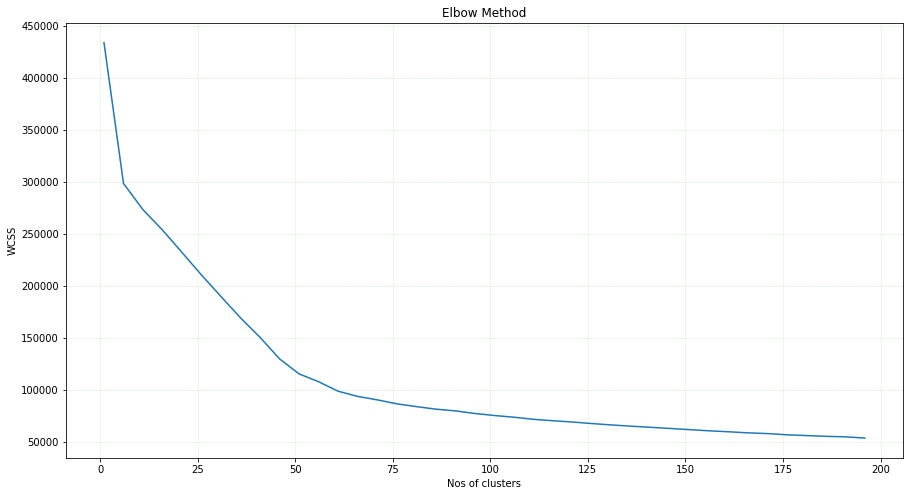

In [56]:

wcss = []
for i in range(1,200,5):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (15, 8), facecolor = None) 
plt.plot(range(1,200,5),wcss)
plt.title('Elbow Method')
plt.xlabel('Nos of clusters')
plt.ylabel('WCSS')
plt.savefig('TheElbow.png')
plt.grid(which="minor",alpha=0.6,linewidth=0.3)
plt.grid(which="major",alpha=0.2,linewidth=0.3)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

In [58]:
kmeans = KMeans(n_clusters=50)
kmeans.fit(X1)
customer_IDcluster=kmeans.labels_

In [59]:
final_df["cluster_no"]=customer_IDcluster
final_df.head()

<ipython-input-59-92210000c7fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["cluster_no"]=customer_IDcluster


,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,...,cluster_value_42,cluster_value_43,cluster_value_44,cluster_value_45,cluster_value_46,cluster_value_47,cluster_value_48,cluster_value_49,mean_price_binned,cluster_no
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,14
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,13,0,1,0,0,0,2,36
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,41
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,2,31
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,9


In [60]:
customer_cluster=final_df[["CustomerID","cluster_no"]]
customer_cluster

,CustomerID,cluster_no
0,12346,14
1,12347,36
2,12348,41
3,12349,31
4,12350,9
...,...,...
4334,18280,14
4335,18281,0
4336,18282,0
4337,18283,4
